## Predicting faulty water pumps

Loading necessary libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', 50)
#np.set_printoptions(threshold=100)

Loading necessary feature values for data and insepcting it 

In [2]:
data = pd.read_csv("data/train features.csv")
labels =pd.read_csv("data/train labels.csv")

In [8]:
print(data.shape)

data.head()

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [9]:
print(labels.head())
print(labels.shape)
print(data.shape)
data.dtypes

      id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
(59400, 2)
(59400, 40)


id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [10]:
data = data.merge(labels, on='id', how='inner')

In [11]:
data.apply(lambda x: any(x.isna()))

id                       False
amount_tsh               False
date_recorded            False
funder                    True
gps_height               False
installer                 True
longitude                False
latitude                 False
wpt_name                 False
num_private              False
basin                    False
subvillage                True
region                   False
region_code              False
district_code            False
lga                      False
ward                     False
population               False
public_meeting            True
recorded_by              False
scheme_management         True
scheme_name               True
permit                    True
construction_year        False
extraction_type          False
extraction_type_group    False
extraction_type_class    False
management               False
management_group         False
payment                  False
payment_type             False
water_quality            False
quality_

Seems like there are 40 columns

In [12]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

So the data has 59400 entries and 41 columns. Now it's time to inspect the columns and data

### Exploration & Cleaning of categorical variables

#### Removing unnnecssary columns

In [13]:
np.unique(data.status_group,return_counts=True)

(array(['functional', 'functional needs repair', 'non functional'],
       dtype=object), array([32259,  4317, 22824], dtype=int64))

In [14]:

np.unique(data.wpt_name, return_counts = True)[1].shape[0]


37400

So there are 37400 unique wpt names in the training set. 

Categorizing based on 37400 unique names does not make sense; plus intuitively names of water pumps will not seem to have a relationship to their faultiness.

So removing wpt_name column

In [15]:
data =data.drop('wpt_name', axis =1)

In [16]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [17]:
#data["funder"] = data["funder"].astype('str')

#np.unique(data[data.funder.isna()], return_counts=True)

data.shape[0]-data.funder.count()


3635

In [13]:
data[data.funder=='0'].shape[0]

777

So there are 3635 nan values and 777 values as 0 which seem not defined as well. So Around 4500 null values. Now lets check count of unique categories here.

So there are 1898 unique funders. 

In [19]:
data.funder.unique().shape

(1898,)

In [20]:
(np.unique(data.funder.astype(str), return_counts=True))

(array(['0', 'A/co Germany', 'Aar', 'Abas Ka', 'Abasia',
        'Abc-ihushi Development Cent', 'Abd', 'Abdala', 'Abddwe', 'Abdul',
        'Abood', 'Abs', 'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act',
        'Act Mara', 'Action Aid', 'Action Contre La Faim', 'Action In A',
        'Adap', 'Adb', 'Adf', 'Adp', 'Adp Bungu', 'Adp Mombo', 'Adp/w',
        'Adra', 'Af', 'Afdp', 'Afric', 'Africa',
        'Africa 2000 Network/undp', 'Africa Amini Alama',
        'Africa Project Ev Germany', 'African', 'African 2000 Network',
        'African Barrick Gold', 'African Development Bank',
        'African Development Foundation', 'African Muslim Agency',
        'African Realief Committe Of Ku', 'African Reflections Foundation',
        'African Relie', 'Africaone Ltd', 'Africare', 'Afriican Reli',
        'Afroz Ismail', 'Afya Department Lindi Rural', 'Agape Churc',
        'Agt Church', 'Ahmadia', 'Ai', 'Aic', 'Aic Church', 'Aic Kij',
        'Aict', 'Aimgold', 'Aixos', 'Alia', 'Ambwene

So makes sense to delete this column

So within unique ones, we have 3635 as Nulls, and 777 as 0s. 
Also out of unique funders 974 have occurrences each one time. So it does not make sense to use this information for modeling the predictions of faultiness. As it has multiple cateogrical names.So removing funders columnn as well. 

In [21]:
data = data.drop('funder', axis =1)


In [22]:
#data['installer']= data['installer'].astype('str')
data.installer.shape[0]-data.installer.count()
#np.unique(data.installer, return_counts=True)

3655

In [23]:
np.unique(data.installer.astype('str'), return_counts=True)[1].shape

(2146,)

So there are 2146 unique installers. Again would not be a good idea to keep this column for modeling by converting categories into numerical values and the model might again be too over fitting.


In [24]:
data = data.drop('installer', axis=1)

In [25]:
np.unique(data.num_private, return_counts=True)

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   14,   15,   16,   17,   20,   22,   23,   24,   25,
          26,   27,   30,   32,   34,   35,   38,   39,   41,   42,   45,
          47,   50,   55,   58,   60,   61,   62,   65,   80,   87,   93,
          94,  102,  111,  120,  131,  136,  141,  150,  160,  180,  213,
         240,  280,  300,  450,  668,  672,  698,  755, 1402, 1776],
       dtype=int64),
 array([58643,    73,    23,    27,    20,    46,    81,    26,    46,
            4,     4,    11,     5,     3,    35,     8,    17,    14,
            6,     1,     5,    12,     2,     2,     1,    40,    10,
            1,     4,    30,    10,     1,    36,    21,     5,     1,
            4,     1,     3,     1,    22,    15,     1,    28,     1,
           20,     1,     7,     1,     1,     1,     6,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1], dtype=int64))

58K values are 0 so does not make sense to keep this column as well.

In [27]:
randindexes = np.random.randint(low =0, high= data.shape[0]-1, size = 1000)

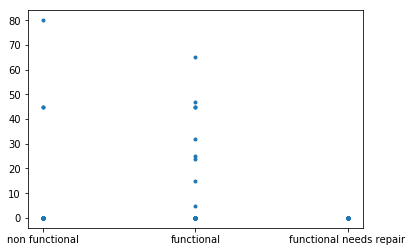

In [28]:
plt.plot( data.status_group[randindexes], data.num_private[randindexes],'.')

So it doesnt really matter it seems as the higher values of num_private column seems to be outliers and have no signifcant correlation with status groups

In [29]:
data =data.drop('num_private', axis =1)

In [30]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


(array([429., 116.,  37.,  57.,  95., 127.,  92.,  37.,   8.,   2.]),
 array([ -43. ,  217.9,  478.8,  739.7, 1000.6, 1261.5, 1522.4, 1783.3,
        2044.2, 2305.1, 2566. ]),
 <a list of 10 Patch objects>)

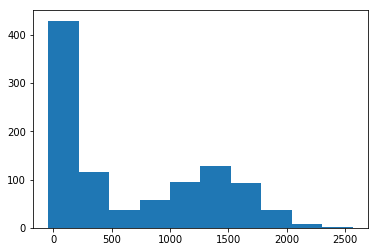

In [31]:
plt.hist(data.gps_height[randindexes])

Seems like quite a few zeros out there lets check the counts for different heights

In [32]:
np.unique(data.gps_height, return_counts=True)

(array([ -90,  -63,  -59,  -57,  -55,  -54,  -53,  -52,  -51,  -50,  -49,
         -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,
         -37,  -36,  -35,  -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,
         -26,  -25,  -24,  -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,
         -15,  -14,  -13,  -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,
          -4,   -3,   -2,   -1,    0,    1,    2,    3,    4,    5,    6,
           7,    8,    9,   10,   11,   12,   13,   14,   15,   16,   17,
          18,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
          29,   30,   31,   32,   33,   34,   35,   36,   37,   38,   39,
          40,   41,   42,   43,   44,   45,   46,   47,   48,   49,   50,
          51,   52,   53,   54,   55,   56,   57,   58,   59,   60,   61,
          62,   63,   64,   65,   66,   67,   68,   69,   70,   71,   72,
          73,   74,   75,   76,   77,   78,   79,   80,   81,   82,   83,
          84,   85,   86,   87,   88, 

So the close to zero spikes are actually for negative values. Lets check a plot of these with target

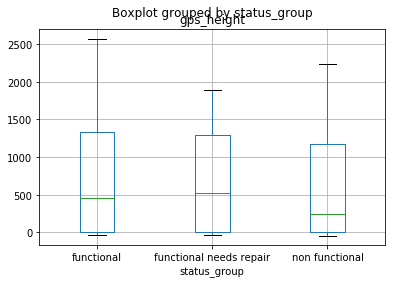

In [33]:
data.iloc[randindexes,:].boxplot('gps_height', by= 'status_group')

So there is not much of a difference for three categories for values of gps_height. We cannot rule this column out. Lets keep it for the model and we need this feature to be ivestigated in detail.

In [34]:
np.unique(data.basin, return_counts=True )

(array(['Internal', 'Lake Nyasa', 'Lake Rukwa', 'Lake Tanganyika',
        'Lake Victoria', 'Pangani', 'Rufiji', 'Ruvuma / Southern Coast',
        'Wami / Ruvu'], dtype=object),
 array([ 7785,  5085,  2454,  6432, 10248,  8940,  7976,  4493,  5987],
       dtype=int64))

So this is a fairly distributed categorical variable and we need to keep it to check its affect on the label`

In [35]:
#data["subvillage"] = data["subvillage"].astype(str)


In [36]:
np.unique(data.subvillage.astype('str'), return_counts=True)

(array(['##', "'A' Kati", '1', '14Kambalage', '18', '19', '20', '22B',
        '23B', '24', '24B', '30', '42', '43', '44', '45', '47', '48', '49',
        '52 A', '53 A', '53 B', '54', '58 B', '60', '61 A', '61 B', '61B',
        '62', '63', 'A', 'Abdu Jumbe', 'Abdujumbe', 'Abene', 'Achatuone',
        'Adyuoyo', 'Afandi', 'Afrika Yakati', 'Afrka Ya Kati', 'Afya',
        'Agentina', 'Ahakabare', 'Ahakagongo', 'Ahakasheshe',
        'Ahakinyinya', 'Ahakishaka', 'Ahara', 'Aicho Kaskazini',
        'Aicho Kusini', 'Airport', 'Ajida', 'Ajika', 'Akashashabo',
        'Akina Mama', 'Akologwe', 'Alabama', 'Alagwa', 'Alairataat',
        'Alakirikir', 'Alamba', 'Alara', 'Alasai', 'Alaya', 'Aleilelai',
        'Alhamisi', 'Alosinoni', 'Alsini', 'Alugoma', 'Aman', 'Aman Chini',
        'Amani', 'Amani Gomvu', 'Ambara', 'Amboni', 'Ambureni', 'Ameni',
        'America', 'Amgera', 'Amka Twende', 'Amkatwende', 'Amkeni', 'Ampa',
        'Amrumo', 'Amrushu Kisale', 'Amrushu Mamba', 'Amrushu Mseta',
 

In [37]:
## null values
data.subvillage.shape[0]- data.subvillage.count()

371

It does look like that there are about 20000 unique subvillages that are present in data set and 371 null values. So again does not make sense to get into each category of village and train data of 60L rows. So removing this column as well.

In [38]:
data = data.drop('subvillage', axis=1)

Now lets investigate region and region_code; And see if they represent same thing. 

In [39]:
data[['region','region_code']][:10]

,region,region_code
0,Iringa,11
1,Mara,20
2,Manyara,21
3,Mtwara,90
4,Kagera,18
5,Tanga,4
6,Shinyanga,17
7,Shinyanga,17
8,Tabora,14
9,Kagera,18


It seems like the region_code represents the region. Lets again confirm this by checking unique values

In [40]:
#data['region'] = data['region'].astype(str)
#data['region_code'] = data['region_code'].astype(str)
np.unique(data[['region','region_code']].astype(str), return_counts=True)[0].shape[0]

48

Now lets check individually

In [41]:
np.unique(data[['region']], return_counts=True)

(array(['Arusha', 'Dar es Salaam', 'Dodoma', 'Iringa', 'Kagera', 'Kigoma',
        'Kilimanjaro', 'Lindi', 'Manyara', 'Mara', 'Mbeya', 'Morogoro',
        'Mtwara', 'Mwanza', 'Pwani', 'Rukwa', 'Ruvuma', 'Shinyanga',
        'Singida', 'Tabora', 'Tanga'], dtype=object),
 array([3350,  805, 2201, 5294, 3316, 2816, 4379, 1546, 1583, 1969, 4639,
        4006, 1730, 3102, 2635, 1808, 2640, 4982, 2093, 1959, 2547],
       dtype=int64))

In [42]:
np.unique(data[['region']], return_counts=True)[0].shape[0]

21

In [43]:
print(np.unique(data[['region_code']], return_counts=True))
np.unique(data[['region_code']], return_counts=True)[0].shape[0]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 24, 40, 60, 80, 90, 99], dtype=int64), array([2201, 3024, 4379, 2513, 4040, 1609,  805,  300,  390, 2640, 5300,
       4639, 2093, 1979, 1808, 2816, 5011, 3324, 3047, 1969, 1583,  326,
          1, 1025, 1238,  917,  423], dtype=int64))


27

The unique values of columns show different results so we may need to investigate this.

In [44]:
for region in np.unique(data[['region']], return_counts=True)[0]:
    print(data[['region','region_code']].iloc[np.where(data.region==region)[0],][:10])

     region  region_code
35   Arusha            2
44   Arusha            2
57   Arusha            2
63   Arusha            2
77   Arusha            2
82   Arusha            2
110  Arusha            2
111  Arusha            2
123  Arusha            2
131  Arusha            2
            region  region_code
145  Dar es Salaam            7
152  Dar es Salaam            7
393  Dar es Salaam            7
417  Dar es Salaam            7
428  Dar es Salaam            7
503  Dar es Salaam            7
567  Dar es Salaam            7
636  Dar es Salaam            7
702  Dar es Salaam            7
797  Dar es Salaam            7
     region  region_code
30   Dodoma            1
37   Dodoma            1
89   Dodoma            1
114  Dodoma            1
242  Dodoma            1
262  Dodoma            1
264  Dodoma            1
295  Dodoma            1
322  Dodoma            1
329  Dodoma            1
    region  region_code
0   Iringa           11
16  Iringa           11
17  Iringa           11
19

Clearly from this result, region_codes 4, 14,13,17,10,15,6,19,90,5, 12,20,21,80,3,16,18,11,1,7,2 are valid and rest seems to be invalid

In [45]:
data.loc[data.region=='Lindi','region_code']=80

In [46]:
data.loc[data.region=='Mtwara','region_code']=90

In [47]:
data.loc[data.region=='Pwani','region_code']=90

Now lets check count again

In [48]:
data['region_code']= data['region_code'].astype(str)
print(np.unique(data[['region_code']], return_counts=True))
np.unique(data[['region_code']], return_counts=True)[0].shape[0]

(array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '24', '3', '4', '5', '7', '80', '90'],
      dtype=object), array([2201, 2640, 5300, 4639, 2093, 1979, 1808, 2816, 5011, 3316, 3047,
       3024, 1969, 1583,  326, 4379, 2513, 4040,  805, 1546, 4365],
      dtype=int64))


21

Okay so now we have correct region codes for regions as both the columns represent same thing. Lets remove the region variable and just keep region_code`

In [49]:
data = data.drop('region',axis =1) 

In [50]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Lets check region_code district code, lga and ward as they correspond to geographay related locations and see if we can remove one or more features

In [51]:
data[['region_code', 'district_code', 'lga','ward']]

,region_code,district_code,lga,ward
0,11,5,Ludewa,Mundindi
1,20,2,Serengeti,Natta
2,21,4,Simanjiro,Ngorika
3,90,63,Nanyumbu,Nanyumbu
4,18,1,Karagwe,Nyakasimbi
5,4,8,Mkinga,Moa
6,17,3,Shinyanga Rural,Samuye
7,17,3,Kahama,Chambo
8,14,6,Tabora Urban,Itetemia
9,18,1,Karagwe,Kaisho


It seems there is no correlation between these columns. So they need to be worked upon separately. 

In [52]:
#data['district_code']= data['district_code'].astype(str)
np.unique(data['district_code'], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 13, 23, 30, 33, 43, 53, 60, 62,
        63, 67, 80], dtype=int64),
 array([   23, 12203, 11173,  9998,  8999,  4356,  4074,  3343,  1043,
          391,   293,   995,   874,   505,   745,    63,   109,   195,
            6,    12], dtype=int64))

So majority have 1 2 and  3 as district codes. The variable needs to be investigated within the model. Lets see have a look at 1000 random district codes with label



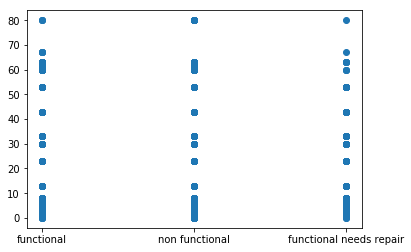

In [53]:
plt.scatter( data.status_group, data.district_code)

The results seems all over the place; with no clear relationship. So it might not be a good idea to remove this column as of now.

Now lets check lga column which means Geographic location

In [54]:
np.unique(data.lga, return_counts=True)

(array(['Arusha Rural', 'Arusha Urban', 'Babati', 'Bagamoyo', 'Bahi',
        'Bariadi', 'Biharamulo', 'Bukoba Rural', 'Bukoba Urban', 'Bukombe',
        'Bunda', 'Chamwino', 'Chato', 'Chunya', 'Dodoma Urban', 'Geita',
        'Hai', 'Hanang', 'Handeni', 'Igunga', 'Ilala', 'Ileje', 'Ilemela',
        'Iramba', 'Iringa Rural', 'Kahama', 'Karagwe', 'Karatu', 'Kasulu',
        'Kibaha', 'Kibondo', 'Kigoma Rural', 'Kigoma Urban', 'Kilindi',
        'Kilolo', 'Kilombero', 'Kilosa', 'Kilwa', 'Kinondoni', 'Kisarawe',
        'Kishapu', 'Kiteto', 'Kondoa', 'Kongwa', 'Korogwe', 'Kwimba',
        'Kyela', 'Lindi Rural', 'Lindi Urban', 'Liwale', 'Longido',
        'Ludewa', 'Lushoto', 'Mafia', 'Magu', 'Makete', 'Manyoni',
        'Masasi', 'Maswa', 'Mbarali', 'Mbeya Rural', 'Mbinga', 'Mbozi',
        'Mbulu', 'Meatu', 'Meru', 'Misenyi', 'Missungwi', 'Mkinga',
        'Mkuranga', 'Monduli', 'Morogoro Rural', 'Morogoro Urban',
        'Moshi Rural', 'Moshi Urban', 'Mpanda', 'Mpwapwa', 'Mtwara Rural

In [55]:
np.unique(data.lga, return_counts=True)[0].shape[0]

125

So 125 categories with fairly distributed number of occurrences of each category -- hints towards keeping this variable as an input to the model.

Now ward column which again denotes some geographic location

In [56]:
np.unique(data.ward, return_counts=True)

(array(['Aghondi', 'Akheri', 'Arash', 'Arri', 'Arusha Chini', 'Babayu',
        'Badi', 'Badugu', 'Bahi', 'Balangidalalu', 'Baleni', 'Bangata',
        'Bangwe', 'Baraa', 'Bargish', 'Bariadi', 'Barikiwa', 'Barray',
        'Bashay', 'Bashinet', 'Bassodesh', 'Bassotu', 'Bendera', 'Berega',
        'Berege', 'Bereko', 'Bigwa', 'Biharamulo Urban', 'Biirabo',
        'Binagi', 'Biro', 'Bitale', 'Boma', "Boma la ng'ombe",
        'Bombambili', 'Bombo', 'Bonde la Songwe', 'Bondeni', 'Bonga',
        'Bubiki', 'Buchambi', 'Budakwa', 'Budekwa', 'Budushi', 'Bugandika',
        'Buganguzi', 'Bugarama', 'Bugene', 'Bugogwe', 'Bugomora', 'Bugoro',
        'Bugorora', 'Bugwema', 'Buhanda businde', 'Buhemba',
        'Buhendangabo', 'Buhigwe', 'Buhingo', 'Buhongwa', 'Buhoro',
        'Bujashi', 'Bujonde', 'Bujugo', 'Bukabwa', 'Bukanda', 'Bukembe',
        'Bukene', 'Bukiko', 'Bukima', 'Bukindo', 'Bukiriro', 'Bukoko',
        'Bukoli', 'Bukombe', 'Bukome', 'Bukondo', 'Bukongo', 'Bukumbi',
        'Buk

In [57]:
np.unique(data.ward, return_counts=True)[0].shape[0]

2092

2100 categories. Lets remove this column for now.

In [58]:
# null vaalues
data.ward.shape[0] - data.ward.count()

0

In [59]:
data = data.drop('ward', axis=1)

In [60]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Now lets investigate **recorded_by** variable

In [61]:
np.unique(data.recorded_by, return_counts=True)

(array(['GeoData Consultants Ltd'], dtype=object), array([59400], dtype=int64))

All values are same for this column. so this does not add any value to the outcome. Lets remove this as well.

In [62]:
data = data.drop('recorded_by', axis=1)

Now lets investigate **scheme_management** variable

In [63]:
#data["scheme_management"]= data["scheme_management"].astype(str)
np.unique(data.scheme_management.astype('str'), return_counts=True)

(array(['Company', 'None', 'Other', 'Parastatal', 'Private operator',
        'SWC', 'Trust', 'VWC', 'WUA', 'WUG', 'Water Board',
        'Water authority', 'nan'], dtype=object),
 array([ 1061,     1,   766,  1680,  1063,    97,    72, 36793,  2883,
         5206,  2748,  3153,  3877], dtype=int64))

There are quite a few nans and one None. Lets replace none with nan and then we will handle nan values later for all data columns.

In [64]:
data.loc[data.scheme_management==None,'scheme_management'] = None

In [65]:
data["scheme_management"]= data["scheme_management"].astype(str)
np.unique(data.scheme_management, return_counts=True)

(array(['Company', 'None', 'Other', 'Parastatal', 'Private operator',
        'SWC', 'Trust', 'VWC', 'WUA', 'WUG', 'Water Board',
        'Water authority', 'nan'], dtype=object),
 array([ 1061,     1,   766,  1680,  1063,    97,    72, 36793,  2883,
         5206,  2748,  3153,  3877], dtype=int64))

In [66]:
#data['scheme_name'] = data['scheme_name'].astype(str)
np.unique(data.scheme_name.astype('str'), return_counts=True)

(array(['14 Kambarage', 'A', 'ADP', 'ADP Simbo', 'ADP Simbu', 'ADRA',
        'AIC', 'AIC kahunda', 'AMREF', 'AMRSF', 'AUWASA Pipe scheme',
        'AUWASA pipe scheme', 'Adra', 'African Barrick Gold',
        'Akheri gravity water supply', 'Alpha crust', 'Amani Water Supply',
        'Amani spring', 'Anglic', 'Araa', 'Arashi water scheme',
        'Arisi/himo', 'Arusha chini water supply', 'Atta', 'B', 'BADIMKA',
        "BASSONYAGWE AND NG'WANDKW", 'BFFS', 'BFFS water supplying',
        'BL Bingati A', 'BL Bingati B', 'BL Bondeni', 'BL Bonifas Kingu',
        'BL Cosmas Woiso', 'BL Dahani Sec', 'BL Dispensary', 'BL Eligudi',
        'BL Embokoi', 'BL Embukoi', 'BL Erasto Laizer', 'BL Esilalei',
        'BL K puchini Sisters', 'BL Kalimaji', 'BL Kandash', 'BL Kandashi',
        'BL Kashashi', 'BL Kashofu', 'BL Kiboshoni', 'BL Kijiweni',
        'BL Kikafu', 'BL Kilari sister', 'BL Kilari sisters',
        'BL Kilimasimba', 'BL Kilingi', 'BL Kimaroroni', 'BL Kirishi',
        'BL Kiru

In [67]:
np.unique(data.scheme_name.astype(str), return_counts=True)[0].shape[0]

2697

In [68]:
data.scheme_name.shape[0] -data.scheme_name.count()

28166

The major chunk of the values are null as 28166 entries for this varible as null. So it does not make sense to give an input to the model whose half features are null,  So removing this columnn as well.

In [69]:
data = data.drop('scheme_name', axis =1 )

In [70]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,True,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,NaN,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,True,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,True,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,0,True,nan,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Now investigating **permit** variable

In [71]:


np.unique(data.permit, return_counts=True )

(array([False, nan, False, nan, False, nan, False, nan, False, nan, False,
        nan, False, nan, False, nan, False, nan, False, nan, False, nan,
        False, nan, nan, False, nan, False, nan, False, nan, False, nan,
        False, nan, False, nan, False, nan, False, nan, False, nan, False,
        nan, False, nan, False, nan, False, nan, False, nan, nan, False,
        nan, False, nan, False, nan, False, nan, False, nan, False, nan,
        False, nan, False, nan, False, nan, False, nan, False, nan, False,
        nan, False, nan, nan, False, nan, False, nan, False, nan, False,
        nan, False, nan, False, nan, False, nan, False, nan, False, nan,
        False, nan, False, nan, False, nan, False, nan, nan, False, nan,
        False, nan, False, nan, False, nan, False, nan, False, nan, False,
        nan, False, nan, False, nan, False, nan, False, nan, False, nan,
        nan, False, nan, False, nan, False, nan, False, nan, False, nan,
        False, nan, False, nan, False, nan,

There are almost 3000 null values. We can deal with null values a bit later. For now lets keep this column as a one of the fetaure inputs to the model. 

In [72]:
data.permit.shape[0]- data.permit.count()

3056

In [73]:

np.unique(data.permit.astype(str), return_counts=True )

(array(['False', 'True', 'nan'], dtype=object),
 array([17492, 38852,  3056], dtype=int64))

In [83]:
#plt.plot(data.permit[randindexes], data.status_group[randindexes], '.')

data.loc[randindexes,['permit', 'status_group']].groupby(['permit', 'status_group'])['status_group'].count()

permit  status_group           
False   functional                 132
        functional needs repair     21
        non functional             110
True    functional                 362
        functional needs repair     48
        non functional             272
Name: status_group, dtype: int64

Now checking variable **construction_year** 

In [84]:
np.unique(data.construction_year, return_counts=True)

(array([   0, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
        1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
        1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]),
 array([20709,   102,    21,    30,    85,    40,    19,    17,    88,
           77,    59,   411,   145,   708,   184,   676,   437,   414,
          202,  1037,   192,   811,   238,   744,   488,   779,   945,
          434,   302,   521,   316,   954,   324,   640,   608,   738,
         1014,   811,   644,   966,   979,  2091,   540,  1075,  1286,
         1123,  1011,  1471,  1587,  2613,  2533,  2645,  1256,  1084,
          176]))

In [85]:
np.unique(data.construction_year, return_counts=True)[0].shape[0]

55

So 55 different construction years with one of the unique years as 0 and having 33% of the total values as 0. That means we can take it as unknown. Lets make a plot of years vs target variablea and see the variation. 

Let see if there is any distinctive pattern for water pump faultiness for construction year 0 and non zero

In [86]:
np.unique(data.status_group[np.where(data.construction_year==0)[0]], return_counts=True)

(array(['functional', 'functional needs repair', 'non functional'],
       dtype=object), array([10555,  1789,  8365]))

Now for non zero  years

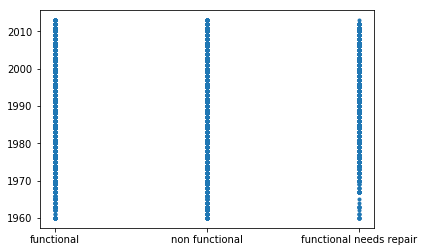

In [87]:
plt.plot(data.status_group[np.where(data.construction_year!=0)[0]], 
         data.construction_year[np.where(data.construction_year!=0)[0]], '.')

In [88]:
np.unique(data.status_group[np.where(data.construction_year!=0)[0]], return_counts=True)

(array(['functional', 'functional needs repair', 'non functional'],
       dtype=object), array([21704,  2528, 14459]))

So there does not seem to be any correlation between construction year and group status.

In [89]:
#data["construction_year"].corr(data["status_group"])

In [74]:
data[['construction_year', 'status_group']].groupby(['construction_year', 'status_group'])['status_group'].count()

construction_year  status_group           
0                  functional                 10555
                   functional needs repair     1789
                   non functional              8365
1960               functional                    24
                   functional needs repair        6
                   non functional                72
1961               functional                     2
                   functional needs repair        3
                   non functional                16
1962               functional                     7
                   functional needs repair        1
                   non functional                22
1963               functional                    31
                   functional needs repair        6
                   non functional                48
1964               functional                     7
                   functional needs repair        1
                   non functional                32
1965               fu

So removing this column as well

In [75]:
data= data.drop('construction_year', axis=1)

In [76]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,True,VWC,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,NaN,Other,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,True,VWC,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,True,VWC,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,0,True,nan,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Now investigating **public_meeting** variable

In [77]:
data['public_meeting']= data['public_meeting'].astype(str)
np.unique(data['public_meeting'], return_counts=True)

(array(['False', 'True', 'nan'], dtype=object),
 array([ 5055, 51011,  3334], dtype=int64))

There are 5000 null values; lets check on these null values in null value handling section later. For now lets keep this feature column

Now lets check columns **extraction_type, extraction_type_group,extraction_type_class**

In [78]:
np.unique(data[['extraction_type']] , return_counts=True)

(array(['afridev', 'cemo', 'climax', 'gravity', 'india mark ii',
        'india mark iii', 'ksb', 'mono', 'nira/tanira', 'other',
        'other - mkulima/shinyanga', 'other - play pump',
        'other - rope pump', 'other - swn 81', 'submersible', 'swn 80',
        'walimi', 'windmill'], dtype=object),
 array([ 1770,    90,    32, 26780,  2400,    98,  1415,  2865,  8154,
         6430,     2,    85,   451,   229,  4764,  3670,    48,   117],
       dtype=int64))

In [79]:
np.unique(data[['extraction_type_group']] , return_counts=True)

(array(['afridev', 'gravity', 'india mark ii', 'india mark iii', 'mono',
        'nira/tanira', 'other', 'other handpump', 'other motorpump',
        'rope pump', 'submersible', 'swn 80', 'wind-powered'], dtype=object),
 array([ 1770, 26780,  2400,    98,  2865,  8154,  6430,   364,   122,
          451,  6179,  3670,   117], dtype=int64))

In [80]:
np.unique(data[['extraction_type_class']] , return_counts=True)

(array(['gravity', 'handpump', 'motorpump', 'other', 'rope pump',
        'submersible', 'wind-powered'], dtype=object),
 array([26780, 16456,  2987,  6430,   451,  6179,   117], dtype=int64))

In [81]:
data[['extraction_type', 'extraction_type_group', 'extraction_type_class']].drop_duplicates()

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
3,submersible,submersible,submersible
6,swn 80,swn 80,handpump
7,nira/tanira,nira/tanira,handpump
8,india mark ii,india mark ii,handpump
18,other,other,other
31,ksb,submersible,submersible
43,mono,mono,motorpump
45,windmill,wind-powered,wind-powered
64,afridev,afridev,handpump


Clearly all these columns indicate same thing i.e. extraction type. The first one indicates each type while second one indicate group, and third by class. Based on unique counts of each category keeping just group and removing others to avoid collinearity in features. 

In [82]:
data = data.drop(['extraction_type', 'extraction_type_class'], axis =1)

In [83]:
print(data.shape)
data.head()

(59400, 29)


,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,scheme_management,permit,extraction_type_group,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,True,VWC,False,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,nan,Other,True,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,True,VWC,True,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,True,VWC,True,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,0,True,nan,True,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Working on management_group column and management columns

In [84]:
np.unique(data.management_group, return_counts=True)

(array(['commercial', 'other', 'parastatal', 'unknown', 'user-group'],
       dtype=object), array([ 3638,   943,  1768,   561, 52490], dtype=int64))

In [85]:
np.unique(data.management, return_counts=True)

(array(['company', 'other', 'other - school', 'parastatal',
        'private operator', 'trust', 'unknown', 'vwc', 'water authority',
        'water board', 'wua', 'wug'], dtype=object),
 array([  685,   844,    99,  1768,  1971,    78,   561, 40507,   904,
         2933,  2535,  6515], dtype=int64))

In [86]:
np.unique(data.scheme_management, return_counts=True)

(array(['Company', 'None', 'Other', 'Parastatal', 'Private operator',
        'SWC', 'Trust', 'VWC', 'WUA', 'WUG', 'Water Board',
        'Water authority', 'nan'], dtype=object),
 array([ 1061,     1,   766,  1680,  1063,    97,    72, 36793,  2883,
         5206,  2748,  3153,  3877], dtype=int64))

Looks like all three columns talk about management and may have collinearity. First checking management and scheme_management. As scheme_management has null values and less categories than management. Removing scheme management and keeping management. 

In [87]:
data = data.drop('scheme_management', axis =1)

Now checking **management and management group** columns

In [88]:
data[['management','management_group']].groupby(['management_group','management'])['management'].count()

management_group  management      
commercial        company               685
                  private operator     1971
                  trust                  78
                  water authority       904
other             other                 844
                  other - school         99
parastatal        parastatal           1768
unknown           unknown               561
user-group        vwc                 40507
                  water board          2933
                  wua                  2535
                  wug                  6515
Name: management, dtype: int64

Clearly it makes more sense to use management group rather than manageemnt individually.

In [89]:
data = data.drop('management',axis=1)

In [90]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,permit,extraction_type_group,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,True,False,gravity,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,nan,True,gravity,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,True,True,gravity,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,True,True,submersible,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,0,True,True,gravity,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Now checking **payment and payment_type**

In [91]:
data[['payment', 'payment_type']].groupby(['payment_type', 'payment'])['payment'].count()

payment_type  payment              
annually      pay annually              3642
monthly       pay monthly               8300
never pay     never pay                25348
on failure    pay when scheme fails     3914
other         other                     1054
per bucket    pay per bucket            8985
unknown       unknown                   8157
Name: payment, dtype: int64

So the payment and payment_type columns represent same thing. Removing one of them for model

In [92]:
data =data.drop('payment_type', axis=1)

In [93]:
data.shape

(59400, 26)

Now investigating **water_quality** and **quality_group** features

In [94]:
data[['quality_group','water_quality']].groupby(['quality_group','water_quality'])['water_quality'].count()

quality_group  water_quality     
colored        coloured                490
fluoride       fluoride                200
               fluoride abandoned       17
good           soft                  50818
milky          milky                   804
salty          salty                  4856
               salty abandoned         339
unknown        unknown                1876
Name: water_quality, dtype: int64

Again makes sense to keep quality group and remove water_quality

In [95]:
data = data.drop('water_quality', axis=1)

Now investigating **source, source_type, source_class**

In [96]:
data[['source','source_type','source_class']].groupby(['source_class','source_type','source'])['source'].count()

source_class  source_type           source              
groundwater   borehole              hand dtw                  874
                                    machine dbh             11075
              shallow well          shallow well            16824
              spring                spring                  17021
surface       dam                   dam                       656
              rainwater harvesting  rainwater harvesting     2295
              river/lake            lake                      765
                                    river                    9612
unknown       other                 other                     212
                                    unknown                    66
Name: source, dtype: int64

Clearly source column is too detailed so removing it and focusing on source_type as source_class appears too shallow

In [97]:
data = data.drop(['source','source_class'], axis=1)

Now investigating **water_type and water_type_group**

In [98]:
data[['waterpoint_type', 'waterpoint_type_group']].groupby(['waterpoint_type_group','waterpoint_type'])['waterpoint_type'].count()

waterpoint_type_group  waterpoint_type            
cattle trough          cattle trough                    116
communal standpipe     communal standpipe             28522
                       communal standpipe multiple     6103
dam                    dam                                7
hand pump              hand pump                      17488
improved spring        improved spring                  784
other                  other                           6380
Name: waterpoint_type, dtype: int64

Lets remove water_type_group to avoid collinearity

In [99]:
data= data.drop('waterpoint_type', axis=1)

In [100]:
data.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,permit,extraction_type_group,management_group,payment,quality_group,quantity,quantity_group,source_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,True,False,gravity,user-group,pay annually,good,enough,enough,spring,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,nan,True,gravity,user-group,never pay,good,insufficient,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,True,True,gravity,user-group,pay per bucket,good,enough,enough,dam,communal standpipe,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,True,True,submersible,user-group,never pay,good,dry,dry,borehole,communal standpipe,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,0,True,True,gravity,other,never pay,good,seasonal,seasonal,rainwater harvesting,communal standpipe,functional


morking on region_code and district code

In [101]:
np.unique(data.region_code, return_counts=True)

(array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
        '2', '20', '21', '24', '3', '4', '5', '7', '80', '90'],
       dtype=object),
 array([2201, 2640, 5300, 4639, 2093, 1979, 1808, 2816, 5011, 3316, 3047,
        3024, 1969, 1583,  326, 4379, 2513, 4040,  805, 1546, 4365],
       dtype=int64))

In [102]:
np.unique(data.district_code, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 13, 23, 30, 33, 43, 53, 60, 62,
        63, 67, 80], dtype=int64),
 array([   23, 12203, 11173,  9998,  8999,  4356,  4074,  3343,  1043,
          391,   293,   995,   874,   505,   745,    63,   109,   195,
            6,    12], dtype=int64))

In [103]:
data[['region_code','district_code']].groupby(['region_code','district_code'])['district_code'].count()

region_code  district_code
1            0                  23
             1                 888
             3                 361
             4                 347
             5                 358
             6                 224
10           1                 423
             2                 652
             3                 750
             4                 121
             5                 694
11           1                 728
             2                 530
             3                 653
             4                2476
             5                 564
             7                 349
12           1                 298
             2                 500
             3                 871
             4                1106
             5                 204
             6                1034
             7                 626
13           1                 544
             2                 995
             3                 377
             4              

 Does not seem to have any correlation

Investigating "date_recorded" column

In [104]:
data['date_recorded']= data['date_recorded'].astype('datetime64')

In [105]:
any(data.date_recorded.isna())

False

In [106]:
(max(data.date_recorded), min(data.date_recorded))

(Timestamp('2013-12-03 00:00:00'), Timestamp('2002-10-14 00:00:00'))

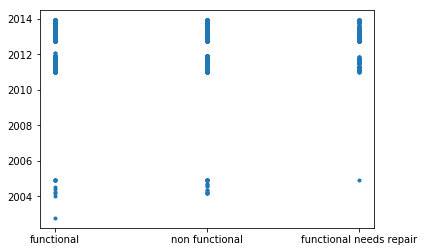

In [107]:
plt.plot(data.status_group, data.date_recorded,'.')

(array([204.,  95.,  11., 152.,   3.,   5.,   0.,   0.,   0.,   0.,   0.,
         29.,  85.,  75., 264.,  50.,   3.,   4.,  10.,  10.]),
 array([734170.  , 734221.75, 734273.5 , 734325.25, 734377.  , 734428.75,
        734480.5 , 734532.25, 734584.  , 734635.75, 734687.5 , 734739.25,
        734791.  , 734842.75, 734894.5 , 734946.25, 734998.  , 735049.75,
        735101.5 , 735153.25, 735205.  ]),
 <a list of 20 Patch objects>)

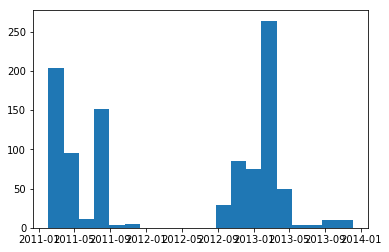

In [108]:
plt.hist(data.date_recorded[randindexes], bins=20)

Based on plots of date recorded vs label and distribution of dates on which data was recorded -- it appears safe to ignore date column

In [109]:
data = data.drop('date_recorded', axis=1)

### Working with null values

In [115]:
print(data.head())
print(data.shape)
any(data.isna())

       amount_tsh  gps_height  longitude   latitude                    basin  \
id                                                                             
69572      6000.0        1390  34.938093  -9.856322               Lake Nyasa   
8776          0.0        1399  34.698766  -2.147466            Lake Victoria   
34310        25.0         686  37.460664  -3.821329                  Pangani   
67743         0.0         263  38.486161 -11.155298  Ruvuma / Southern Coast   
19728         0.0           0  31.130847  -1.825359            Lake Victoria   

      region_code  district_code        lga  population public_meeting permit  \
id                                                                              
69572          11              5     Ludewa         109           True  False   
8776           20              2  Serengeti         280            nan   True   
34310          21              4  Simanjiro         250           True   True   
67743          90             63  

True

In [116]:
data.index = data.id

AttributeError: 'DataFrame' object has no attribute 'id'

In [112]:
data = data.drop(['id'], axis=1)

In [118]:
data.dtypes
data['permit'].dtype

dtype('O')

In [123]:

print(data.shape) 

data.head()

(59400, 20)


,amount_tsh,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,public_meeting,permit,extraction_type_group,management_group,payment,quality_group,quantity,quantity_group,source_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,True,False,gravity,user-group,pay annually,good,enough,enough,spring,communal standpipe,functional
8776,0.0,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,nan,True,gravity,user-group,never pay,good,insufficient,insufficient,rainwater harvesting,communal standpipe,functional
34310,25.0,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,True,True,gravity,user-group,pay per bucket,good,enough,enough,dam,communal standpipe,functional
67743,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,True,True,submersible,user-group,never pay,good,dry,dry,borehole,communal standpipe,non functional
19728,0.0,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,0,True,True,gravity,other,never pay,good,seasonal,seasonal,rainwater harvesting,communal standpipe,functional


In [127]:
data.apply(lambda x:  any(x.isna()))

amount_tsh               False
gps_height               False
longitude                False
latitude                 False
basin                    False
region_code              False
district_code            False
lga                      False
population               False
public_meeting           False
permit                    True
extraction_type_group    False
management_group         False
payment                  False
quality_group            False
quantity                 False
quantity_group           False
source_type              False
waterpoint_type_group    False
status_group             False
dtype: bool

In [132]:
data.apply(lambda x:  x.dtype)

amount_tsh               object
gps_height               object
longitude                object
latitude                 object
basin                    object
region_code              object
district_code            object
lga                      object
population               object
public_meeting           object
permit                   object
extraction_type_group    object
management_group         object
payment                  object
quality_group            object
quantity                 object
quantity_group           object
source_type              object
waterpoint_type_group    object
status_group             object
dtype: object